## Preprocessing

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

import tensorflow as tf

In [78]:
labels = np.load("../labels.npy")

In [79]:
labels.shape, labels[0]

((3288, 2), array(['img/0_0-4020-0.jpg', 'Blue-Black Team'], dtype='<U21'))

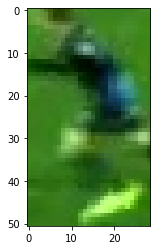

In [80]:
img = mpimg.imread("../" + labels[0][0])
plt.imshow(img)
plt.show()

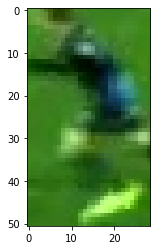

In [81]:
img = img / 255.0
plt.imshow(img)
plt.show()

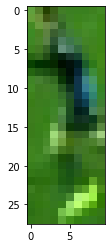

In [63]:
resized_image = cv2.resize(img, (10, 28))
plt.imshow(resized_image)
plt.show()

In [64]:
means = resized_image.mean(axis=(0,1), dtype='float64')
std = resized_image.std(axis=(0,1), dtype='float64')
normalized_img = (resized_image - means) / std

In [65]:
normalized_img.mean(), normalized_img.std()

(3.552713678800501e-16, 0.9999999999999997)

In [66]:
y = []
x = []

In [67]:
for file_name, label in labels:
  img = cv2.imread("../" + file_name)
  img = img / 255.0
  resized_image = cv2.resize(img, (10, 28))
  means = resized_image.mean(axis=(0,1), dtype='float64')
  std = resized_image.std(axis=(0,1), dtype='float64')
  normalized_img = (resized_image - means) / std
  x.append(resized_image)
  if label == "Blue-Black Team":
    y.append([1, 0, 0])
  elif label == "Referee":
    y.append([0, 1, 0])
  elif label == "Red-White Team":
    y.append([0, 0, 1])

In [68]:
X = np.array(x)
y = np.array(y)

In [69]:
X.shape, y.shape

((3288, 28, 10, 3), (3288, 3))

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [92]:
X_train.shape, X_test.shape

((2959, 28, 10, 3), (329, 28, 10, 3))

In [93]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,10,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 8, 64)         1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 4, 64)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 2, 128)        73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               82048     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [95]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [96]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
93/93 [==============================] - 3s 20ms/step - loss: 0.2637 - accuracy: 0.9040 - val_loss: 0.0551 - val_accuracy: 0.9909
Epoch 2/10
93/93 [==============================] - 2s 18ms/step - loss: 0.0659 - accuracy: 0.9845 - val_loss: 0.0580 - val_accuracy: 0.9909
Epoch 3/10
93/93 [==============================] - 2s 19ms/step - loss: 0.0495 - accuracy: 0.9861 - val_loss: 0.0655 - val_accuracy: 0.9848
Epoch 4/10
93/93 [==============================] - 2s 18ms/step - loss: 0.0383 - accuracy: 0.9916 - val_loss: 0.0367 - val_accuracy: 0.9970
Epoch 5/10
93/93 [==============================] - 2s 18ms/step - loss: 0.0471 - accuracy: 0.9882 - val_loss: 0.0405 - val_accuracy: 0.9970
Epoch 6/10
93/93 [==============================] - 2s 18ms/step - loss: 0.0290 - accuracy: 0.9943 - val_loss: 0.0453 - val_accuracy: 0.9970
Epoch 7/10
93/93 [==============================] - 2s 19ms/step - loss: 0.0274 - accuracy: 0.9946 - val_loss: 0.0438 - val_accuracy: 0.9970
Epoch 8/10
93

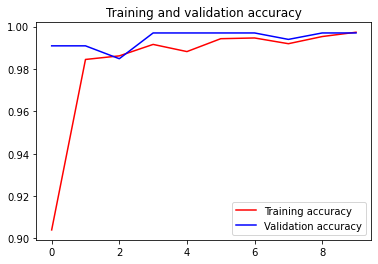

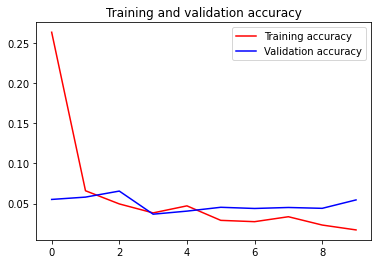

<Figure size 432x288 with 0 Axes>

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [98]:
model.save("spc3.h5")